In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris = pd.read_csv("D:\Kuliah\Machine Learning\iris.csv") #load the dataset

In [4]:
iris = iris.head(100) #menggunakan 100 data awal

In [5]:
iris['Species'] = np.where(iris['Species']=='Iris-setosa', 0, 1) #mengganti kelas menjadi 0 atau 1
#iris

In [6]:
#memasukkan data ke variabel
x1 = iris.iloc[:,1]
x2 = iris.iloc[:,2]
x3 = iris.iloc[:,3]
x4 = iris.iloc[:,4]
kelas = iris['Species']
kelas

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
70    1
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
90    1
91    1
92    1
93    1
94    1
95    1
96    1
97    1
98    1
99    1
Name: Species, Length: 100, dtype: int32

In [7]:
#inisiasi awal
theta1 = 0.1
theta2 = 0.2
theta3 = 0.3
theta4 = 0.4
bias = 0.3

alpha = 0.1
epoch = 60

In [8]:
#Rumus-rumus

#h(x,theta,bias)
def h_value(x1,x2,x3,x4,theta1,theta2,theta3,theta4,bias,i):
    h = x1[i]*theta1+x2[i]*theta2+x3[i]*theta3+x4[i]*theta4+bias
    return h
    
#sigmoid(h)
def sigmoid_value(h):
    return ((2.71**h)/(2.71**h+1))

#prediction
def prediction_value(sigmoid):
    if sigmoid>=0.5:
        prediction_value=1;
    else:
        prediction_value=0
    return prediction_value

#new delta theta and bias
def delta_theta_and_bias(sigmoid,prediction,kelas,x1,x2,x3,x4,i):
    deltatheta1 = 2*(sigmoid-kelas[i])*(1-sigmoid)*sigmoid*x1[i]
    deltatheta2 = 2*(sigmoid-kelas[i])*(1-sigmoid)*sigmoid*x2[i]
    deltatheta3 = 2*(sigmoid-kelas[i])*(1-sigmoid)*sigmoid*x3[i]
    deltatheta4 = 2*(sigmoid-kelas[i])*(1-sigmoid)*sigmoid*x4[i]
    deltabias = 2*(sigmoid-kelas[i])*(1-sigmoid)*sigmoid
    return deltatheta1,deltatheta2,deltatheta3,deltatheta4,deltabias

#new theta and bias
def new_theta_and_bias(deltatheta1,deltatheta2,deltatheta3,deltatheta4,
                       deltabias,theta1,theta2,theta3,theta4,bias,alpha):
    theta1 = theta1-deltatheta1*alpha
    theta2 = theta2-deltatheta2*alpha
    theta3 = theta3-deltatheta3*alpha
    theta4 = theta4-deltatheta4*alpha
    bias = bias-deltabias*alpha
    return theta1,theta2,theta3,theta4,bias

In [9]:
#melakukan training data

error_ar = np.zeros(60)
avg_error_ar = np.zeros(60)

#untuk setiap epoch
for i in range(epoch):
    #tiap epoch iterasi 100 data
    for j in range(100):
        #inisiasi jumlah error
        error_sum = 0
        #perhitungan h(x,theta,i)
        h = h_value(x1,x2,x3,x4,theta1,theta2,theta3,theta4,bias,j)
        #perhitungan sigmoid(h)
        sigmoid = sigmoid_value(h)
        #perhitungan prediksi
        prediction = prediction_value(sigmoid)
        #perhitungan delta theta dan delta bia
        deltatheta1,deltatheta2,deltatheta3,deltatheta4,deltabias = delta_theta_and_bias(sigmoid,prediction,kelas,x1,x2,x3,x4,j)
        #assign new thetas and bias value
        theta1,theta2,theta3,thetat4,bias = new_theta_and_bias(deltatheta1,deltatheta2,deltatheta3,deltatheta4,deltabias,theta1,theta2,theta3,theta4,bias,alpha)
        #calculate error
        error = (prediction-sigmoid)**2
        error_sum = error_sum + error
        #iteration
        j = j+1
    #assign error sum per epoch
    error_ar[i] = error_sum
    print(error_sum)
    #average error sum
    avg = sum(error_ar)/float(100)
    #assign avg error sum per epoch
    avg_error_ar[i] = avg
    print(avg)
        
    

0.0010002707343072716
1.0002707343072715e-05
0.0009474292054224197
1.9476999397296915e-05
0.0009119097470282858
2.8596096867579772e-05
0.0008858335434777418
3.745443230235719e-05
0.0008391124737993363
4.584555704035056e-05
0.0007930354852666463
5.377591189301702e-05
0.000764713894862659
6.142305084164361e-05
0.0007416214063796787
6.88392649054404e-05
0.0007169331862562895
7.60085967680033e-05
0.0006907064540564709
8.2915661308568e-05
0.0006638950517138959
8.955461182570696e-05
0.0006370707809830052
9.592531963553702e-05
0.0006105405073929879
0.0001020307247094669
0.0005845033682036522
0.00010787575839150341
0.0005591158377840769
0.0001134669167693442
0.0005345088604402691
0.00011881200537374688
0.0005107887548310021
0.00012391989292205688
0.00048803531087117196
0.0001288002460307686
0.00046630142261868193
0.00013346326025695542
0.00044561487964478745
0.0001379194090534033
0.0004259816926273856
0.00014217922597967717
0.0004073901281855547
0.00014625312726153272
0.00038981480044110483
0.

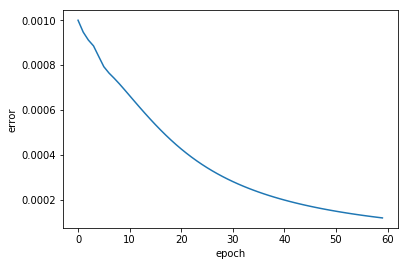

In [11]:
plt.plot(error_ar)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()

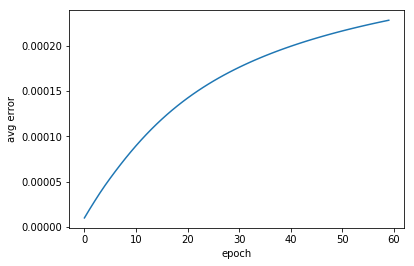

In [14]:
plt.plot(avg_error_ar)
plt.ylabel('avg error')
plt.xlabel('epoch')
plt.show()